In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib as plt
from DataMacpy import *
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization

DataMacpy Setup


In [2]:
df = pd.read_csv("train3.csv")

In [3]:
df.rename(columns ={'Dağıtılan Enerji (MWh)':'DE'}, inplace=True)

In [4]:
y = df.DE

In [5]:
X = df.copy()
X.drop(["DE", "date", "hour"], axis=1, inplace=True)

In [6]:
object_cols, d = calc_object_cols(X)

In [7]:
object_cols

['season', 'HourControl']

In [8]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])

In [9]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [10]:
"""from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)"""

'from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler(feature_range=(0, 1))\ntrain_scaled = scaler.fit_transform(train)\ntest_scaled = scaler.transform(test)'

In [11]:
X_train

,month,year,o_clock,season,HourControl
27039,1,2021,15,3.0,0.0
2485,4,2018,13,1.0,0.0
9857,2,2019,17,3.0,0.0
36056,2,2022,8,3.0,0.0
19522,3,2020,10,1.0,0.0
...,...,...,...,...,...
20757,5,2020,21,1.0,1.0
32103,8,2021,15,2.0,0.0
30403,6,2021,19,2.0,1.0
21243,6,2020,3,2.0,1.0


In [12]:
X_valid

,month,year,o_clock,season,HourControl
28238,3,2021,14,1.0,0.0
36096,2,2022,0,3.0,1.0
22447,7,2020,7,2.0,0.0
5389,8,2018,13,2.0,0.0
15609,10,2019,9,0.0,0.0
...,...,...,...,...,...
35230,1,2022,22,3.0,1.0
1522,3,2018,10,1.0,0.0
20090,4,2020,2,1.0,1.0
8115,12,2018,3,3.0,1.0


In [13]:
X_train.shape[0]

32121

In [14]:
X_train.shape[1]

5

In [15]:
X_train2 = X_train.to_numpy()

In [16]:
X_train2

array([[1.000e+00, 2.021e+03, 1.500e+01, 3.000e+00, 0.000e+00],
       [4.000e+00, 2.018e+03, 1.300e+01, 1.000e+00, 0.000e+00],
       [2.000e+00, 2.019e+03, 1.700e+01, 3.000e+00, 0.000e+00],
       ...,
       [6.000e+00, 2.021e+03, 1.900e+01, 2.000e+00, 1.000e+00],
       [6.000e+00, 2.020e+03, 3.000e+00, 2.000e+00, 1.000e+00],
       [4.000e+00, 2.018e+03, 2.000e+01, 1.000e+00, 1.000e+00]])

In [17]:
X_train2.shape

(32121, 5)

In [18]:
X_train.shape

(32121, 5)

In [19]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))

In [20]:
X_train2.shape

(32121, 5, 1)

In [21]:
X_valid2 = X_valid.to_numpy()

In [22]:
X_valid2 = np.reshape(X_valid2, (X_valid2.shape[0], X_valid2.shape[1], 1))

In [148]:
model = Sequential()
model.add(LSTM(256, input_shape = (5, 1)))  # This is my first hidden layer with 128 memory blocks
model.add(Dense(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(32))
model.add(Dense(1))   # This is my output layer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [149]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 256)               264192    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 307,457
Trainable params: 307,457
Non-trainable params: 0
_________________________________________________________________


In [150]:
history = model.fit(X_train2, y_train, epochs=20, batch_size=128)

Epoch 1/20
251/251 [==============================] - 11s 36ms/step - loss: 643510.5625
Epoch 2/20
251/251 [==============================] - 9s 36ms/step - loss: 104889.3359
Epoch 3/20
251/251 [==============================] - 9s 36ms/step - loss: 96804.0938
Epoch 4/20
251/251 [==============================] - 10s 39ms/step - loss: 88467.4688
Epoch 5/20
251/251 [==============================] - 10s 40ms/step - loss: 67902.9453
Epoch 6/20
251/251 [==============================] - 11s 43ms/step - loss: 62647.1523
Epoch 7/20
251/251 [==============================] - 9s 35ms/step - loss: 56766.2695
Epoch 8/20
251/251 [==============================] - 9s 35ms/step - loss: 50339.1016
Epoch 9/20
251/251 [==============================] - 9s 37ms/step - loss: 48362.0820
Epoch 10/20
251/251 [==============================] - 9s 35ms/step - loss: 47360.8203
Epoch 11/20
251/251 [==============================] - 9s 34ms/step - loss: 47403.8438
Epoch 12/20
251/251 [=========================

In [184]:
y_pred = model.predict(X_valid2)

251/251 [==============================] - 2s 8ms/step


In [152]:
y_pred[:5]

array([[1936.2886],
       [1713.6718],
       [1671.8463],
       [2634.765 ],
       [1755.1746]], dtype=float32)

In [153]:
y_valid[:5]

28238    2047.054460
36096    1671.202000
22447    1845.658259
5389     2686.360736
15609    1303.162531
Name: DE, dtype: float64

In [154]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid, y_pred)*100

8.255703413750554

In [155]:
# 9.26 (aktivasyon fonksiyonsuz)
# 8.93 ('relu')
# 8.75 (20'den 10 epoch'a düşürüldü dense katmanı artırıldı)
# 8.35 (20 epoch dense katmanı artırılmış şekilde bir dense katmanına 'relu' fonksiyonu eklendi)
# 8.25 (iyileştirmeler yapıldı.)

<AxesSubplot: >

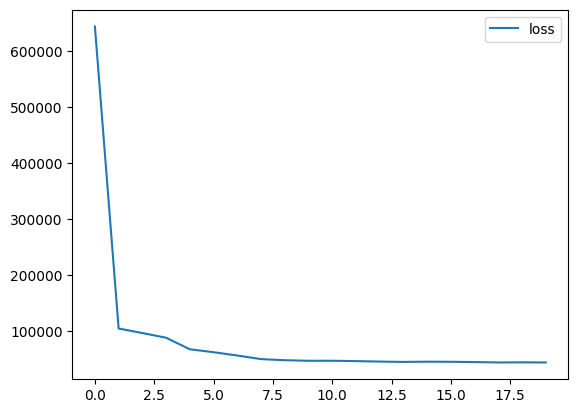

In [156]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [185]:
from sklearn.ensemble import ExtraTreesRegressor
model2 = ExtraTreesRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_valid)
mean_absolute_percentage_error(y_valid, y_pred2)*100

7.419465931357161

In [186]:
y_pred.shape

(8031, 1)

In [187]:
y_pred2.shape

(8031,)

In [193]:
y_pred = y_pred.reshape(8031,)

In [198]:
y_pred3 = None
y_pred3 = y_pred * 0.2 + y_pred2 * 0.8

In [199]:
mean_absolute_percentage_error(y_valid, y_pred3)*100

7.3851817522398555